# Trainig a Model Using the MNIST datase for recgonise hand-writen digits
    On this notebook we show how to create a model using  MNIST dataset.
    We start showing how to read the bits from the dataset



  [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/) 

# The Data

  We will start by undertandig how the data is formated and parsing it i a suuitable way for train our model.
  
  Mnist provide 4 files: 



## Little and Big Endian Architecture 

  There are 2 types of processors architecture(litle and big endian). In litle endian bits are store from left to righ This is basically how the bytes are stored, in litle they are stored from left to right and in big the other way around.(Look this is you want to know more about https://chortle.ccsu.edu/AssemblyTutorial/Chapter-15/ass15_3.html ).
  This is relevant for us because we need to know read the bytes right for get the proper data.
  In python we can easyle check using sys, since I am using a Intel processor i expected to be litle.

In [1]:
import numpy as np

In [2]:
from sys import byteorder

In [3]:
print(byteorder)

little


In [4]:
import gzip

with gzip.open('mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    fc_train_img = f.read()

 The first 4 bytes is the magic number which is a 32 bit integer, for the image set this number is 2051. Note that we are setting the byteorder as big.

In [5]:
int.from_bytes(fc_train_img[0:4], byteorder='big')

2051

 Then we expect the number of images 6000 and the rows and columns 28 by 28

In [6]:
train_img_total = int.from_bytes(fc_train_img[4:8], byteorder='big')
train_img_total

60000

In [7]:
row = int.from_bytes(fc_train_img[8:12], byteorder='big')
row

28

In [8]:
col = int.from_bytes(fc_train_img[12:16], byteorder='big')
col

28

In [9]:
last_byte = (train_img_total*row*col) + 16
img_train = list(fc_train_img[16:last_byte])
img_train = ~np.array(img_train).reshape(train_img_total,row*col).astype(np.uint8)


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

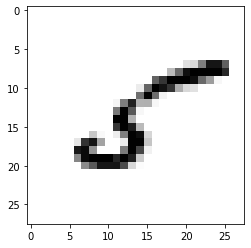

In [11]:
plt.imshow(img_train[11].reshape(row,col), cmap='gray')

In [12]:
with gzip.open('mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    fc_train_lbl = f.read()

In [13]:
int.from_bytes(fc_train_lbl[0:4], byteorder='big')


2049

In [14]:
train_lvl_total = int.from_bytes(fc_train_lbl[4:8], byteorder='big')
train_lvl_total

60000

In [15]:
lbl_train = np.array(list(fc_train_lbl[8:train_lvl_total+8]))

In [16]:
print(lbl_train[11])

5


In [17]:
with gzip.open('mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    fc_test_img = f.read()
with gzip.open('mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    fc_test_lbl = f.read()
    
test_img_total = int.from_bytes(fc_test_img[4:8], byteorder='big')
test_lbl_total = int.from_bytes(fc_test_lbl[4:8], byteorder='big')

last_byte = (test_img_total*row*col) + 16
img_test = list(fc_test_img[16:last_byte])
img_test = ~np.array(img_test).reshape(test_img_total,row*col).astype(np.uint8)

lbl_test = np.array(list(fc_test_lbl[8:test_lbl_total+8]))

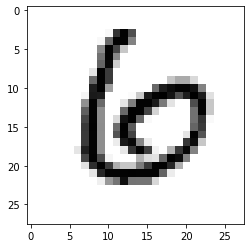

In [18]:
plt.imshow(img_test[11].reshape(row,col), cmap='gray')

In [19]:
print(lbl_test[11])

6


In [20]:
import keras as kr

Using TensorFlow backend.


In [21]:
model = kr.models.Sequential()

In [22]:
model.add(kr.layers.Dense(units=10, input_dim=784, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

## Activation : softmax
  We want our result to represent a probablility of being one of the 10 digits(0,1,3...).
  The softmax activation function will do this for us, it will output our output for each neuron beetwen 0 and 1.Then each 
  of our neuron can represent a a digit so the one will bigger probability will be our prediction.
  
  $$\sigma (z)_j = \frac{e^{(z)_j}}{\sum_{k=0}^{K}e^{(z)_k}} \text{  where   j = 1,...,K}$$  
  
  In our case K = 10.
  
  https://www.analyticsvidhya.com/blog/2017/10/fundamentals-deep-learning-activation-functions-when-to-use-them/



In [24]:
test = np.arange(0.0, 784, 1).reshape(1,784)
result = model.predict(test)
result


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [25]:
sum = 0 
for i in result[0]:
    sum += i
sum

1.0

## Loss : categorical_crossentropy

    After we calculate our result we need to calculate the distance beetween our prediction and our epected result.
    https://algorithmia.com/blog/introduction-to-loss-functions
    

## Optimazer : adam
https://algorithmia.com/blog/introduction-to-optimizers

In [26]:
lbl_train = kr.utils.to_categorical(lbl_train, 10)
lbl_test  = kr.utils.to_categorical(lbl_test, 10)

In [27]:
lbl_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
img_train =  img_train/255.0
img_test = img_test/255.0

In [29]:
epoch = 10
history_callback = model.fit(img_train, lbl_train, validation_data=(img_test,lbl_test), epochs=epoch, batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.8026 - accuracy: 0.7868 - val_loss: 0.4486 - val_accuracy: 0.8778
Epoch 2/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.4263 - accuracy: 0.8794 - val_loss: 0.3774 - val_accuracy: 0.8969
Epoch 3/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.3753 - accuracy: 0.8925 - val_loss: 0.3411 - val_accuracy: 0.9016
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.3527 - accuracy: 0.8969 - val_loss: 0.3262 - val_accuracy: 0.9065
Epoch 5/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.3393 - accuracy: 0.9017 - val_loss: 0.3086 - val_accuracy: 0.9126
Epoch 6/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.3279 - accuracy: 0.9043 - val_loss: 0.3174 - val_accuracy: 0.9059
Epoch 7/10
60000/60000 [==============================] - 1s 19us/st

In [30]:
val_accuracy = np.array(history_callback.history['val_accuracy'])
val_loss =  np.array(history_callback.history['val_loss'])
accuracy =  np.array(history_callback.history['accuracy'])
loss =  np.array(history_callback.history['loss'])

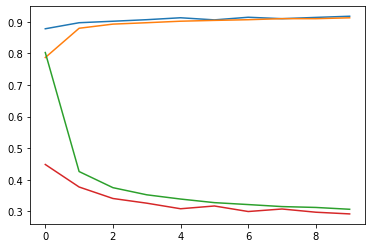

In [31]:
x = np.arange(0.0, epoch, 1)
plt.plot(x,val_accuracy,x,accuracy,x,loss,x,val_loss)

In [32]:
model_final  = kr.models.Sequential()
class CustomModelCheckpoint(kr.callbacks.Callback):
    minimun = 0.8
          
    def on_epoch_end(self, epoch, logs=None):
       
        # logs is a dictionary
        print(f"epoch: {epoch},history_callback.{logs['val_accuracy']}")
       
        if logs['val_accuracy'] > self.minimun: # your custom condition
    
          
            model.save('model1.h5', overwrite=True)
                     
            self.minimun = logs['val_accuracy']
            print(self.minimun)
            print("saved")

In [33]:
cbk = CustomModelCheckpoint()
history_callback = model.fit(img_train, lbl_train, validation_data=(img_test,lbl_test), epochs=epoch, batch_size=100, callbacks=[cbk])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.3065 - accuracy: 0.9118 - val_loss: 0.2940 - val_accuracy: 0.9143
epoch: 0,history_callback.0.9143000245094299
0.9143000245094299
saved
Epoch 2/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.3031 - accuracy: 0.9137 - val_loss: 0.3046 - val_accuracy: 0.9119
epoch: 1,history_callback.0.911899983882904
Epoch 3/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.3006 - accuracy: 0.9132 - val_loss: 0.2921 - val_accuracy: 0.9168
epoch: 2,history_callback.0.9168000221252441
0.9168000221252441
saved
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.2976 - accuracy: 0.9150 - val_loss: 0.2870 - val_accuracy: 0.9172
epoch: 3,history_callback.0.9172000288963318
0.9172000288963318
saved
Epoch 5/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.2969 - accuracy: 0.9152 - v

In [34]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(units=512, input_dim=784, activation='relu'))
model.add(kr.layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [35]:
history_callback = model.fit(img_train, lbl_train, validation_data=(img_test,lbl_test), epochs=epoch, batch_size=100,
                             callbacks=[cbk])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.5595 - accuracy: 0.8378 - val_loss: 0.3622 - val_accuracy: 0.8927
Epoch 2/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3282 - accuracy: 0.9025 - val_loss: 0.2814 - val_accuracy: 0.9208
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2658 - accuracy: 0.9216 - val_loss: 0.2159 - val_accuracy: 0.9365
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2182 - accuracy: 0.9355 - val_loss: 0.1996 - val_accuracy: 0.9375
Epoch 5/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.1856 - accuracy: 0.9444 - val_loss: 0.1810 - val_accuracy: 0.9436
Epoch 6/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1637 - accuracy: 0.9510 - val_loss: 0.1367 - val_accuracy: 0.9579
Epoch 7/10
60000/60000 [==============================] - 1s 22us/st

In [36]:
val_accuracy = np.array(history_callback.history['val_accuracy'])
val_loss =  np.array(history_callback.history['val_loss'])
accuracy =  np.array(history_callback.history['accuracy'])
loss =  np.array(history_callback.history['loss'])

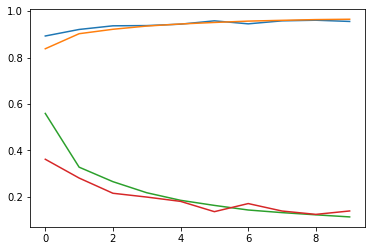

In [37]:
x = np.arange(0.0, epoch, 1)
plt.plot(x,val_accuracy,x,accuracy,x,loss,x,val_loss)

In [38]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(units=512, input_dim=784, activation='relu'))
model.add(kr.layers.Dropout(0.01))
model.add(kr.layers.Dense(units=98, activation='relu'))
model.add(kr.layers.Dropout(0.1))
model.add(kr.layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [44]:
epoch = 100
history_callback = model.fit(img_train, lbl_train, validation_data=(img_test,lbl_test), epochs=epoch, batch_size=100
                             , callbacks=[cbk])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.0258 - accuracy: 0.9914 - val_loss: 0.1074 - val_accuracy: 0.9766
epoch: 0,history_callback.0.9765999913215637
0.9765999913215637
saved
Epoch 2/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.0230 - accuracy: 0.9922 - val_loss: 0.0978 - val_accuracy: 0.9794
epoch: 1,history_callback.0.9793999791145325
0.9793999791145325
saved
Epoch 3/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.0215 - accuracy: 0.9925 - val_loss: 0.1072 - val_accuracy: 0.9785
epoch: 2,history_callback.0.9785000085830688
Epoch 4/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0223 - accuracy: 0.9925 - val_loss: 0.0982 - val_accuracy: 0.9799
epoch: 3,history_callback.0.9799000024795532
0.9799000024795532
saved
Epoch 5/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0256 - accuracy: 0.99

60000/60000 [==============================] - 2s 28us/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.1279 - val_accuracy: 0.9756
epoch: 41,history_callback.0.975600004196167
Epoch 43/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.1124 - val_accuracy: 0.9770
epoch: 42,history_callback.0.9769999980926514
Epoch 44/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0208 - accuracy: 0.9932 - val_loss: 0.1149 - val_accuracy: 0.9764
epoch: 43,history_callback.0.9764000177383423
Epoch 45/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0200 - accuracy: 0.9932 - val_loss: 0.1159 - val_accuracy: 0.9781
epoch: 44,history_callback.0.9781000018119812
Epoch 46/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0191 - accuracy: 0.9937 - val_loss: 0.1196 - val_accuracy: 0.9780
epoch: 45,history_callback.0.9779999852180481
Epoch 47/100
60000/60000 [=============

60000/60000 [==============================] - 2s 28us/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 0.1224 - val_accuracy: 0.9797
epoch: 83,history_callback.0.9797000288963318
Epoch 85/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 0.1110 - val_accuracy: 0.9811
epoch: 84,history_callback.0.9811000227928162
Epoch 86/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.0132 - accuracy: 0.9955 - val_loss: 0.1303 - val_accuracy: 0.9799
epoch: 85,history_callback.0.9799000024795532
Epoch 87/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.1335 - val_accuracy: 0.9792
epoch: 86,history_callback.0.979200005531311
Epoch 88/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.1118 - val_accuracy: 0.9800
epoch: 87,history_callback.0.9800000190734863
Epoch 89/100
60000/60000 [=============

In [45]:
val_accuracy = np.array(history_callback.history['val_accuracy'])
val_loss =  np.array(history_callback.history['val_loss'])
accuracy =  np.array(history_callback.history['accuracy'])
loss =  np.array(history_callback.history['loss'])

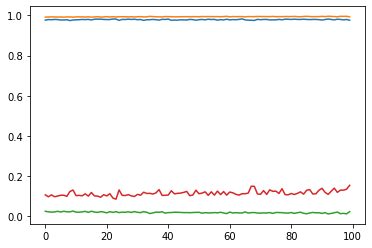

In [46]:

x = np.arange(0.0, epoch, 1)
plt.plot(x,val_accuracy,x,accuracy,x,loss,x,val_loss)

In [47]:
score = kr.models.load_model('./model1.h5').evaluate(img_test, lbl_test, verbose=0)
score

[0.11305010078672885, 0.9829000234603882]

In [56]:
img_train = img_train.reshape(train_img_total,col,row,1)
img_test = img_test.reshape(test_img_total,col,row,1)

In [50]:
img_train[0]

array([[[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        

In [60]:
model = kr.models.Sequential()
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Conv2D(128,kernel_size=(5, 5),activation='relu'))
model.add(kr.layers.Conv2D(256,kernel_size=(3, 3),activation='relu'))
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Flatten())
model.add(kr.layers.Dropout(0.25))
model.add(kr.layers.Dense(units=98, activation='relu'))
model.add(kr.layers.Dropout(0.1))
model.add(kr.layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [61]:
epoch = 10
history_callback = model.fit(img_train, lbl_train, validation_data=(img_test,lbl_test), epochs=epoch, batch_size=100
                             , callbacks=[cbk])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.2088 - accuracy: 0.9337 - val_loss: 0.0421 - val_accuracy: 0.9874
epoch: 0,history_callback.0.9873999953269958
Epoch 2/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0576 - accuracy: 0.9835 - val_loss: 0.0308 - val_accuracy: 0.9897
epoch: 1,history_callback.0.9897000193595886
Epoch 3/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0448 - accuracy: 0.9875 - val_loss: 0.0469 - val_accuracy: 0.9856
epoch: 2,history_callback.0.9855999946594238
Epoch 4/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0384 - accuracy: 0.9889 - val_loss: 0.0418 - val_accuracy: 0.9890
epoch: 3,history_callback.0.9890000224113464
Epoch 5/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0296 - accuracy: 0.9912 - val_loss: 0.0301 - val_accuracy: 0.9911
epoch: 4,history_callback.0.9911000

In [62]:
score = kr.models.load_model('./model1.h5').evaluate(img_test, lbl_test, verbose=0)
score

[0.027023627741792733, 0.9934999942779541]

In [64]:
model = kr.models.Sequential()
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
kr.layers.BatchNormalization(axis=-1)
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
kr.layers.BatchNormalization(axis=-1)
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Conv2D(128,kernel_size=(5, 5),activation='relu'))
kr.layers.BatchNormalization(axis=-1)
model.add(kr.layers.Conv2D(256,kernel_size=(3, 3),activation='relu'))
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Flatten())
model.add(kr.layers.Dropout(0.25))
model.add(kr.layers.Dense(units=98, activation='relu'))
model.add(kr.layers.Dropout(0.1))
model.add(kr.layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [65]:
epoch = 10
history_callback = model.fit(img_train, lbl_train, validation_data=(img_test,lbl_test), epochs=epoch, batch_size=100
                             , callbacks=[cbk])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2451 - accuracy: 0.9208 - val_loss: 0.0619 - val_accuracy: 0.9807
epoch: 0,history_callback.0.9807000160217285
Epoch 2/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0645 - accuracy: 0.9817 - val_loss: 0.0365 - val_accuracy: 0.9886
epoch: 1,history_callback.0.9886000156402588
Epoch 3/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0457 - accuracy: 0.9870 - val_loss: 0.0302 - val_accuracy: 0.9910
epoch: 2,history_callback.0.9909999966621399
Epoch 4/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.0383 - accuracy: 0.9889 - val_loss: 0.0383 - val_accuracy: 0.9885
epoch: 3,history_callback.0.9884999990463257
Epoch 5/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.0346 - accuracy: 0.9900 - val_loss: 0.0498 - val_accuracy: 0.9866
epoch: 4,history_callback.0.9865999

In [66]:
score = kr.models.load_model('./model1.h5').evaluate(img_test, lbl_test, verbose=0)
score

[0.027023627741792733, 0.9934999942779541]

In [67]:
model = kr.models.Sequential()
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Conv2D(128,kernel_size=(5, 5),activation='relu'))
model.add(kr.layers.Conv2D(256,kernel_size=(3, 3),activation='relu'))
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Flatten())
model.add(kr.layers.Dropout(0.25))
model.add(kr.layers.Dense(units=98, activation='relu'))
model.add(kr.layers.Dropout(0.1))
model.add(kr.layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [68]:
from keras.preprocessing.image import ImageDataGenerator

In [71]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

In [72]:
train_generator = gen.flow(img_train, lbl_train, batch_size=64)
test_generator = test_gen.flow(img_test, lbl_test, batch_size=64)

In [75]:
epoch =10
history_callback= model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=epoch, 
                    validation_data=test_generator, validation_steps=10000//64, callbacks=[cbk])

Epoch 1/10
937/937 [==============================] - 10s 10ms/step - loss: 0.0391 - accuracy: 0.9895 - val_loss: 0.1664 - val_accuracy: 0.9935
epoch: 0,history_callback.0.9934895634651184
Epoch 2/10
937/937 [==============================] - 10s 10ms/step - loss: 0.0355 - accuracy: 0.9900 - val_loss: 0.0025 - val_accuracy: 0.9926
epoch: 1,history_callback.0.9925523400306702
Epoch 3/10
937/937 [==============================] - 9s 10ms/step - loss: 0.0369 - accuracy: 0.9899 - val_loss: 8.8657e-05 - val_accuracy: 0.9935
epoch: 2,history_callback.0.9934581518173218
Epoch 4/10
937/937 [==============================] - 9s 10ms/step - loss: 0.0342 - accuracy: 0.9905 - val_loss: 0.0066 - val_accuracy: 0.9928
epoch: 3,history_callback.0.9927536249160767
Epoch 5/10
937/937 [==============================] - 10s 11ms/step - loss: 0.0359 - accuracy: 0.9902 - val_loss: 0.0067 - val_accuracy: 0.9943
epoch: 4,history_callback.0.9942632913589478
0.9942632913589478
saved
Epoch 6/10
937/937 [========

In [74]:
score = kr.models.load_model('./model1.h5').evaluate(img_test, lbl_test, verbose=0)
score

[0.027023627741792733, 0.9934999942779541]